In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
features = ['host_compromise_ratio']

In [6]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 300
new_network = True
model = "main_network_final_host_compromise_ratio#exposed_endpoints#attack_path_exposure#overall_asr_avg#roa#shortest_path_variability#risk"

In [8]:
evaluation = execute_ai_model(features = features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network, model = model)

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


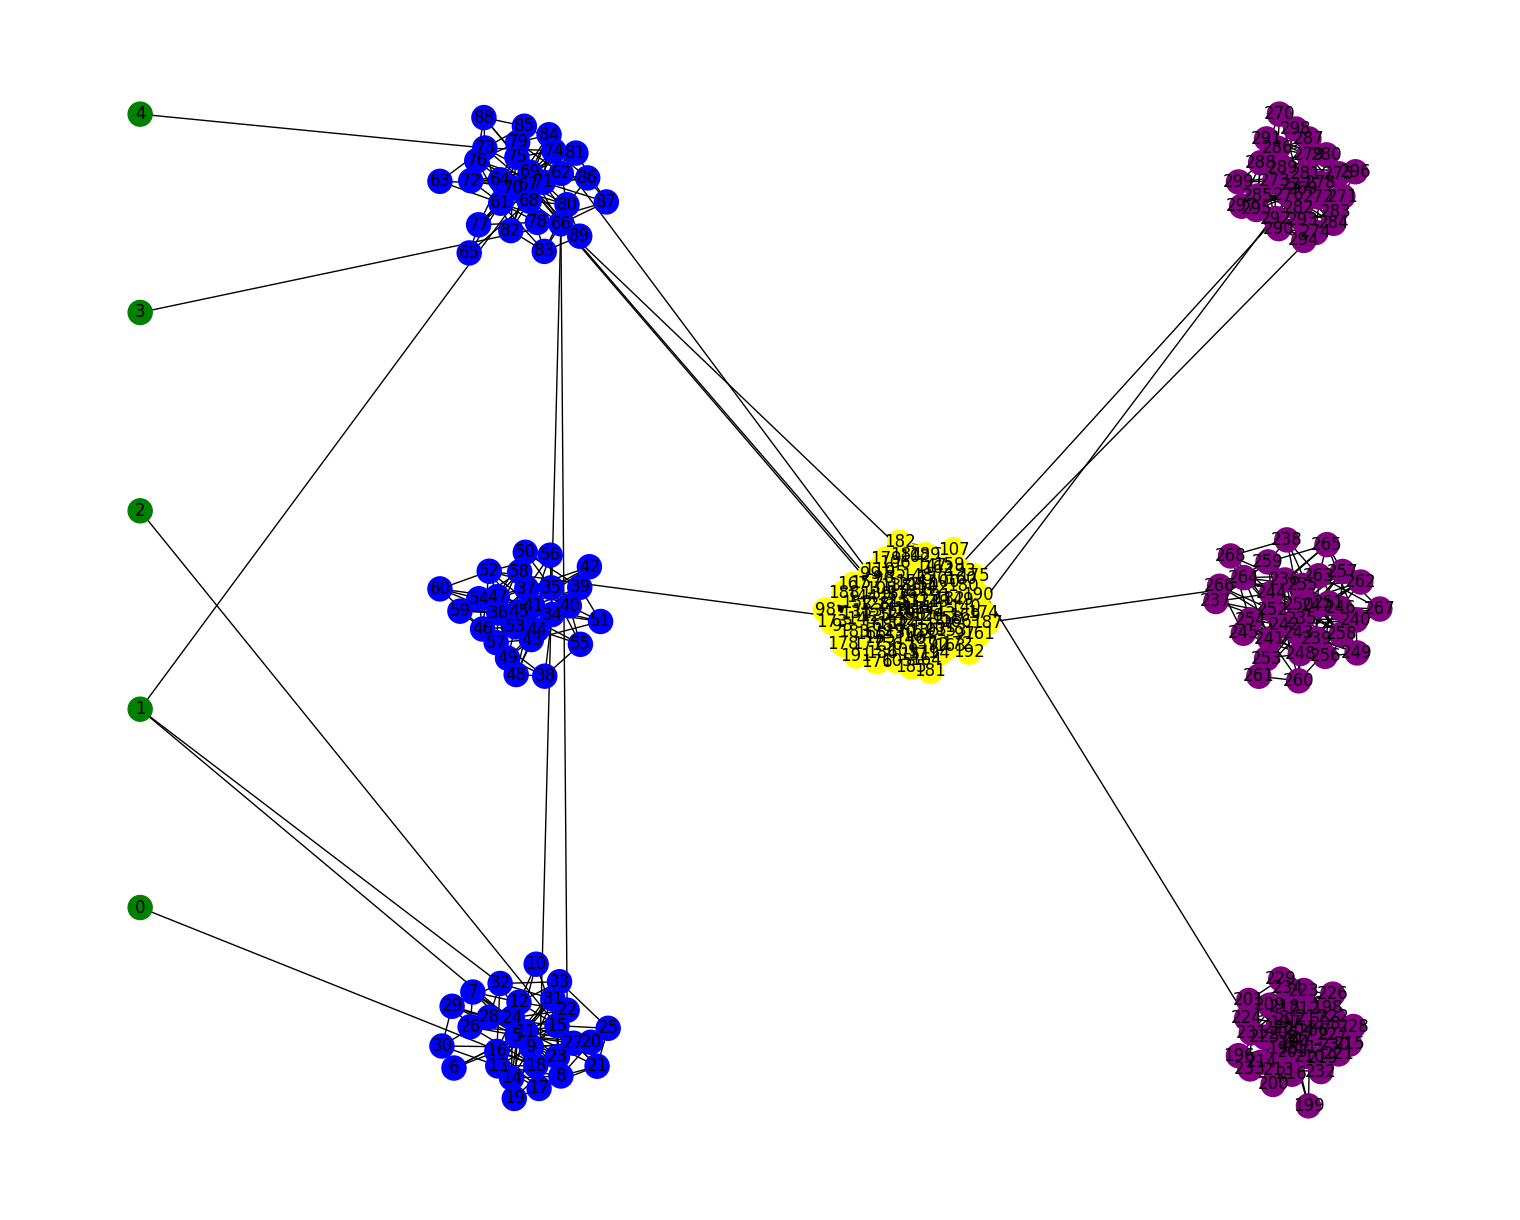

In [9]:
evaluation.get_network().draw()
plt.show()

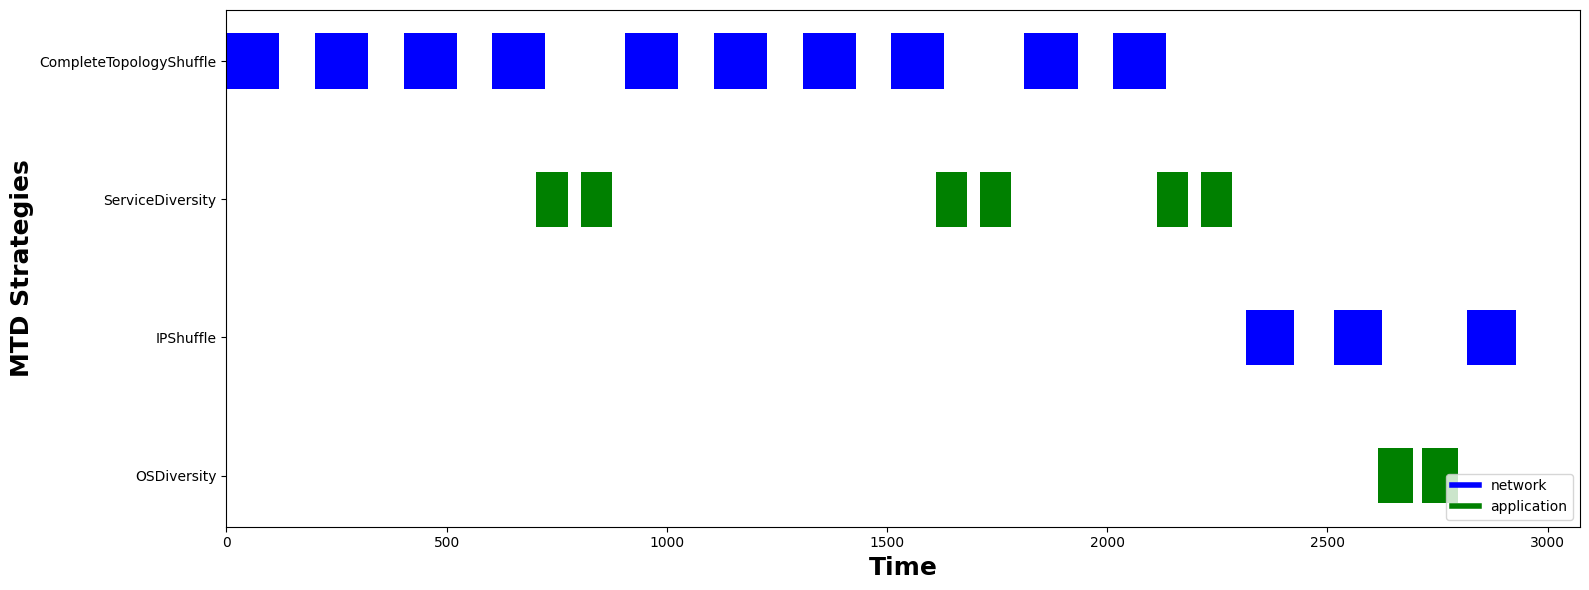

In [10]:
evaluation.visualise_mtd_operation()

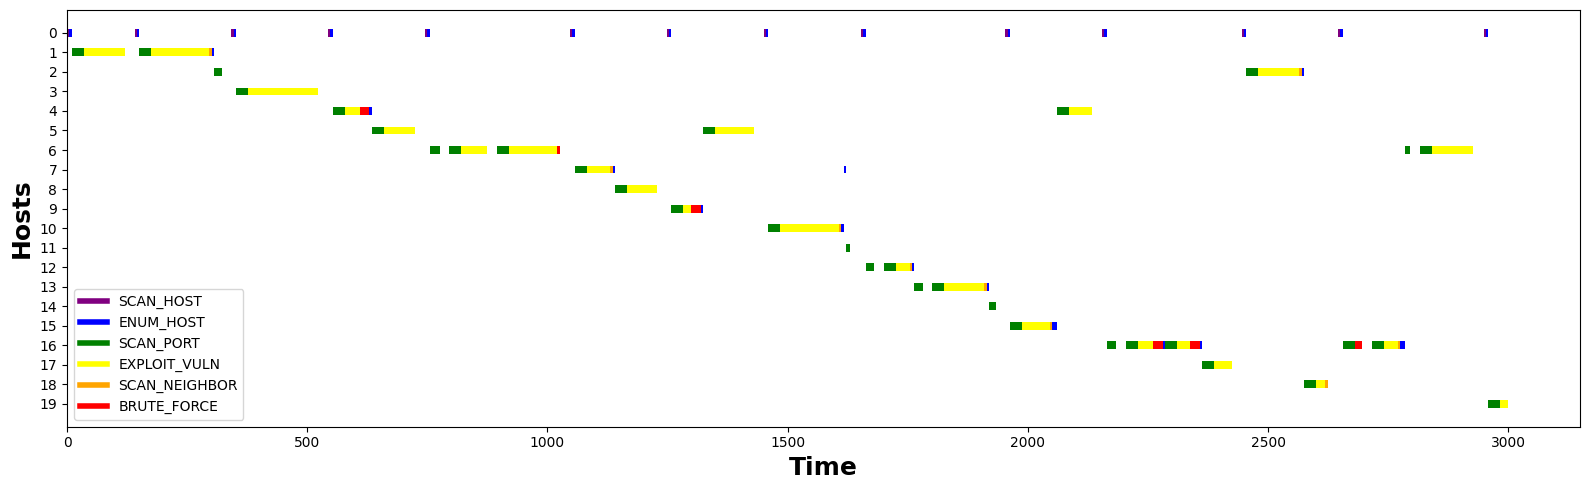

In [11]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  9


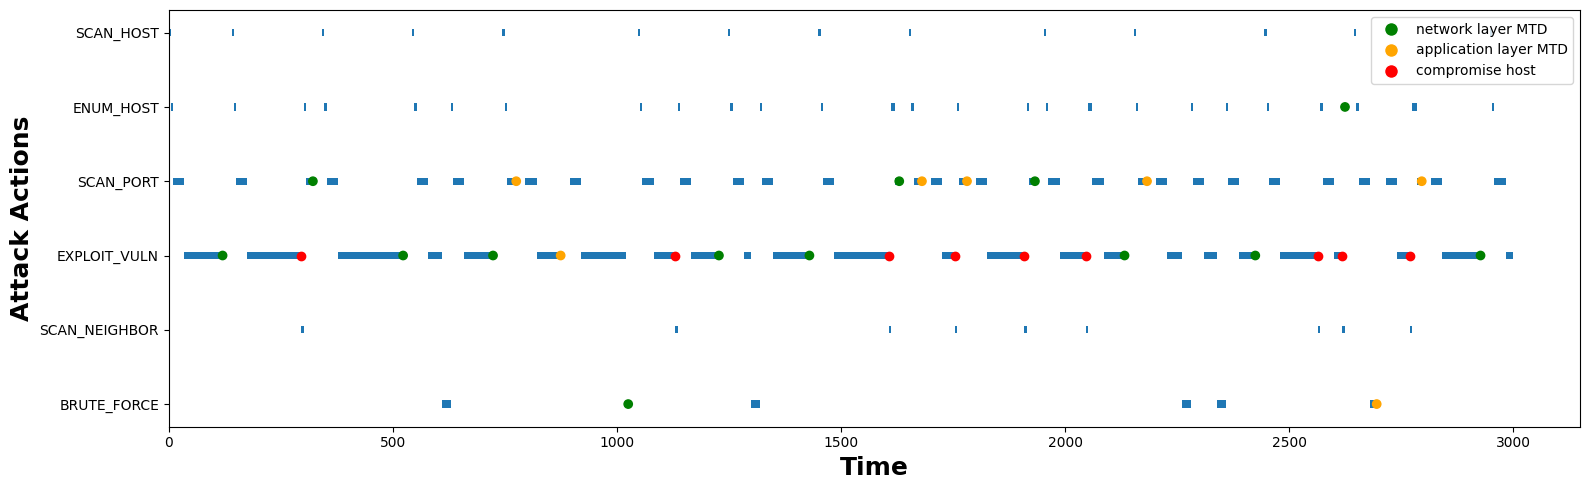

In [12]:
evaluation.visualise_attack_operation()

In [13]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
41,EXPLOIT_VULN,292.571365,295.755454,3.184090,0,f5718986-8ddf-426e-bc7b-f7c790c25f6e,0,f5718986-8ddf-426e-bc7b-f7c790c25f6e,2,34,0,"[Patti, Lauree, Winne, Phyllys, Cristy]",None,None,yellow,1
125,EXPLOIT_VULN,1121.011677,1130.565825,9.554149,49,0181d0d8-74c4-471b-b660-cdfc646367ba,49,0181d0d8-74c4-471b-b660-cdfc646367ba,1,94,1,"[Glennie, Di, Karissa, Mariya, Zsa Zsa]",None,None,yellow,7
190,EXPLOIT_VULN,1602.883016,1606.337361,3.454345,63,d82775f3-bb42-4265-8b2b-cc8f17028078,63,d82775f3-bb42-4265-8b2b-cc8f17028078,1,145,2,"[Franni, Meagan, Indira, Alexine, Rose]",None,None,yellow,10
201,EXPLOIT_VULN,1748.122418,1754.002287,5.879869,76,7ab73070-33a5-4fd0-b3d1-d4a2e8320bf0,76,7ab73070-33a5-4fd0-b3d1-d4a2e8320bf0,1,148,3,"[Donetta, Matilda, Lorrin, Ulla, Celina]",None,None,yellow,12
217,EXPLOIT_VULN,1892.784299,1909.464557,16.680258,99,77dc6372-8837-4c2a-8889-d7b29edc706b,99,77dc6372-8837-4c2a-8889-d7b29edc706b,1,160,4,"[Jillie, Evie, Korella, Danika, Anastasie]",None,None,yellow,13
230,EXPLOIT_VULN,2023.960492,2045.946456,21.985964,36,d4633120-d45a-444e-89a3-394b4be1638e,36,d4633120-d45a-444e-89a3-394b4be1638e,1,167,5,"[Lindsey, Jeane, Gwynne, Linea, Renae]",None,None,yellow,15
282,EXPLOIT_VULN,2551.629757,2565.065894,13.436137,18,8b99bf59-b9a0-40e6-82a2-c4766540cdc9,18,8b99bf59-b9a0-40e6-82a2-c4766540cdc9,2,200,6,"[Bethina, Janith, Tabitha, Aubrette]",None,None,yellow,2
290,EXPLOIT_VULN,2613.234749,2618.928789,5.694040,17,0dfdac72-de1b-4d8b-9309-74662f27f613,17,0dfdac72-de1b-4d8b-9309-74662f27f613,1,205,7,"[Aida, Latrina, Gus, Ivy]",None,None,yellow,18
301,EXPLOIT_VULN,2765.569479,2769.540554,3.971074,67,211cc403-6151-4222-8468-b3331e4a66b8,67,211cc403-6151-4222-8468-b3331e4a66b8,3,209,8,"[Yolane, Evanne, Malanie, Claudie, Brynn]",None,None,yellow,16


In [14]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [15]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
41,EXPLOIT_VULN,292.571365,295.755454,3.184090,0,f5718986-8ddf-426e-bc7b-f7c790c25f6e,0,f5718986-8ddf-426e-bc7b-f7c790c25f6e,2,34,0,"[Patti, Lauree, Winne, Phyllys, Cristy]",None,None,yellow,1
125,EXPLOIT_VULN,1121.011677,1130.565825,9.554149,49,0181d0d8-74c4-471b-b660-cdfc646367ba,49,0181d0d8-74c4-471b-b660-cdfc646367ba,1,94,1,"[Glennie, Di, Karissa, Mariya, Zsa Zsa]",None,None,yellow,7
190,EXPLOIT_VULN,1602.883016,1606.337361,3.454345,63,d82775f3-bb42-4265-8b2b-cc8f17028078,63,d82775f3-bb42-4265-8b2b-cc8f17028078,1,145,2,"[Franni, Meagan, Indira, Alexine, Rose]",None,None,yellow,10
201,EXPLOIT_VULN,1748.122418,1754.002287,5.879869,76,7ab73070-33a5-4fd0-b3d1-d4a2e8320bf0,76,7ab73070-33a5-4fd0-b3d1-d4a2e8320bf0,1,148,3,"[Donetta, Matilda, Lorrin, Ulla, Celina]",None,None,yellow,12
217,EXPLOIT_VULN,1892.784299,1909.464557,16.680258,99,77dc6372-8837-4c2a-8889-d7b29edc706b,99,77dc6372-8837-4c2a-8889-d7b29edc706b,1,160,4,"[Jillie, Evie, Korella, Danika, Anastasie]",None,None,yellow,13
230,EXPLOIT_VULN,2023.960492,2045.946456,21.985964,36,d4633120-d45a-444e-89a3-394b4be1638e,36,d4633120-d45a-444e-89a3-394b4be1638e,1,167,5,"[Lindsey, Jeane, Gwynne, Linea, Renae]",None,None,yellow,15
282,EXPLOIT_VULN,2551.629757,2565.065894,13.436137,18,8b99bf59-b9a0-40e6-82a2-c4766540cdc9,18,8b99bf59-b9a0-40e6-82a2-c4766540cdc9,2,200,6,"[Bethina, Janith, Tabitha, Aubrette]",None,None,yellow,2
290,EXPLOIT_VULN,2613.234749,2618.928789,5.694040,17,0dfdac72-de1b-4d8b-9309-74662f27f613,17,0dfdac72-de1b-4d8b-9309-74662f27f613,1,205,7,"[Aida, Latrina, Gus, Ivy]",None,None,yellow,18
301,EXPLOIT_VULN,2765.569479,2769.540554,3.971074,67,211cc403-6151-4222-8468-b3331e4a66b8,67,211cc403-6151-4222-8468-b3331e4a66b8,3,209,8,"[Yolane, Evanne, Malanie, Claudie, Brynn]",None,None,yellow,16


In [16]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [17]:
evaluation.evaluation_result_by_compromise_checkpoint()

[]